# Data Insights

With our clusters formed, we now attemp to draw data-driven insights from the results. With these insights, we hope to be able to recommend strategies to help the business meet the needs of the customers better, and potentially explore new marketing opportunities and increase its revenue.


In [18]:
%%capture

# Running the previous files
%run data-clustering.ipynb


## Evaluating the model

We performed unsupervisied agglomerative clustering and do not have a target feature to score our model. Thus, we will study the patterns and insights in the clusters formed and analyse our customer segments through exploratory data analysis.


### Spending

We observe the spending patterns of our customer segments.


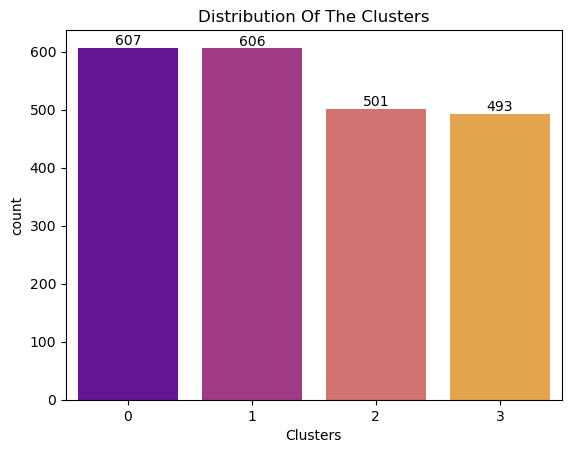

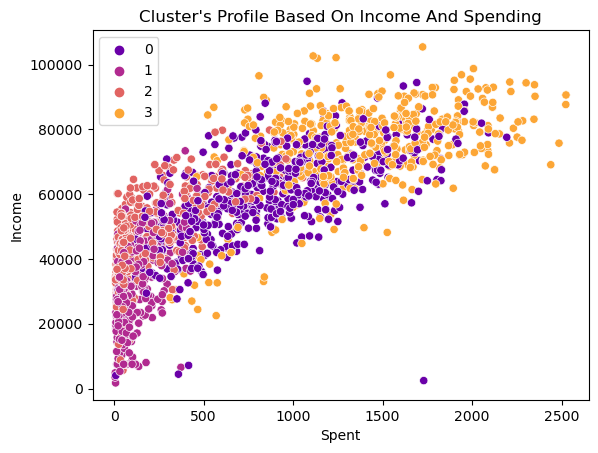

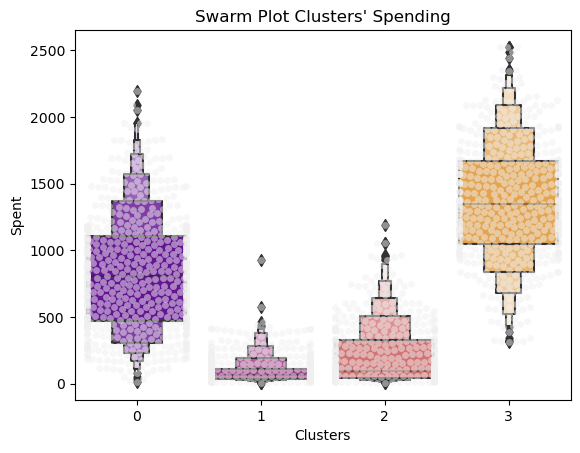

In [19]:
colors = sns.color_palette("plasma", n_colors=4)
data = data[(data["Income"] < 110000)]  # Remove outliers

# Plotting count plot of the clusters
pl = sns.countplot(x=data["Clusters"], palette=colors)
pl.set_title("Distribution Of The Clusters")
for p in pl.patches:
    height = int(p.get_height())
    pl.annotate(
        f"{height}",
        (p.get_x() + p.get_width() / 2.0, height),
        ha="center",
        va="center",
        xytext=(0, 5),
        textcoords="offset points",
    )
plt.show()

# Plotting scatter plot of the clusters
pl = sns.scatterplot(
    data=data, x=data["Spent"], y=data["Income"], hue=data["Clusters"], palette=colors
)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

# Plotting swarm plot of the clusters
pl = sns.swarmplot(x=data["Clusters"], y=data["Spent"], color="#F0F0F0", alpha=0.5)
pl = sns.boxenplot(x=data["Clusters"], y=data["Spent"], palette=colors)
pl.set_title("Swarm Plot Clusters' Spending")
plt.show()


Using the same "income vs spending" plot as the previous section, we can conclude that:

- Group 0 has medium-high income and medium spending
- Group 1 has low income and low spending
- Group 2 has medium income and medium-low spending
- Group 3 has high income and high spending

From the swarm plot, it is then not surprising to see Group 3 being our most valuable segment of customers with the highest spendings, followed closely by Group 0.


### Campaigns

Next, we observe the performance of our campaigns.


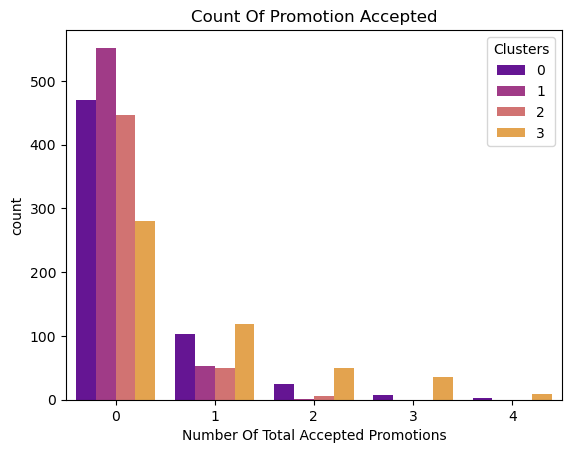

In [20]:
# Creating a feature to get a sum of accepted promotions
data["Total_Promos"] = (
    data["AcceptedCmp1"]
    + data["AcceptedCmp2"]
    + data["AcceptedCmp3"]
    + data["AcceptedCmp4"]
    + data["AcceptedCmp5"]
)

# Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=data["Total_Promos"], hue=data["Clusters"], palette=colors)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()


The performances of the campaigns are unsatisfactory. There is a steep drop in number of promotions accepted after the initial launch. Moreover, from the third campaign onwards, the number of participants is minimal across all clusters.

It perhaps makes more sense to pivot the campaigns to be more targeted to each segment.


### Discount Deals

Next, we observe the performance of our discount deals.


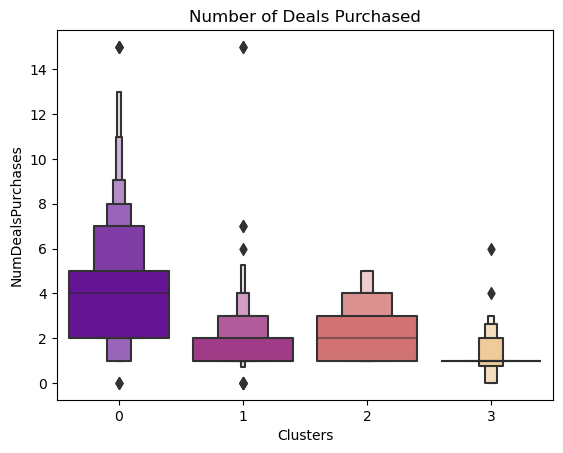

In [21]:
# Plotting the number of deals purchased
plt.figure()
pl = sns.boxenplot(y=data["NumDealsPurchases"], x=data["Clusters"], palette=colors)
pl.set_title("Number of Deals Purchased")
plt.show()


Similarly, the discount deals performed poorly as well. Our most valuable segment, Group 3, has especially poor response to discount deals. This could perhaps be attributed to their high income background, and their decision-making is likely less affected by discount deals.

Fortunately, our second largest spender, Group 0, has the best response to discount deals.


## Profiling the clusters

We have observed the purchasing habits of our clusters, as well as their responses to campaigns and discount deals.

Now, we will attempt to profile the clusters and identify the types of customers in them. This will provide us with more specific information on who the customers are, and help us in creating targeted marketing strategies.

The method that we shall utilise is to plot certain features that are indicative of a customer's personal traits in the cluster they are in. The profiling can then be inferred from the results.


<Figure size 640x480 with 0 Axes>

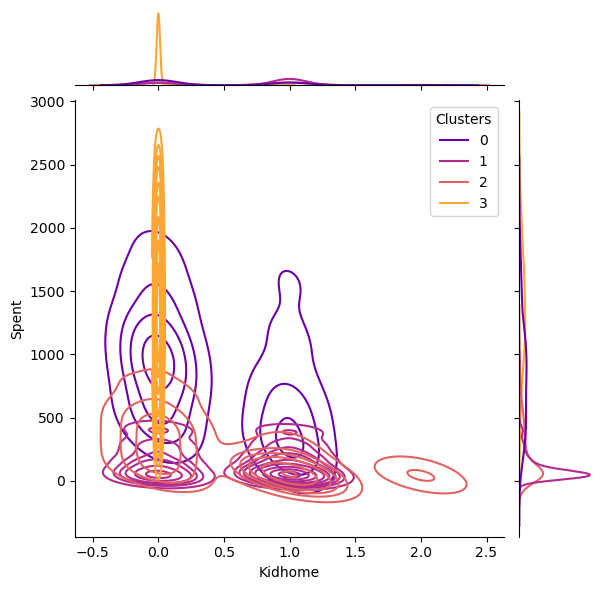

<Figure size 640x480 with 0 Axes>

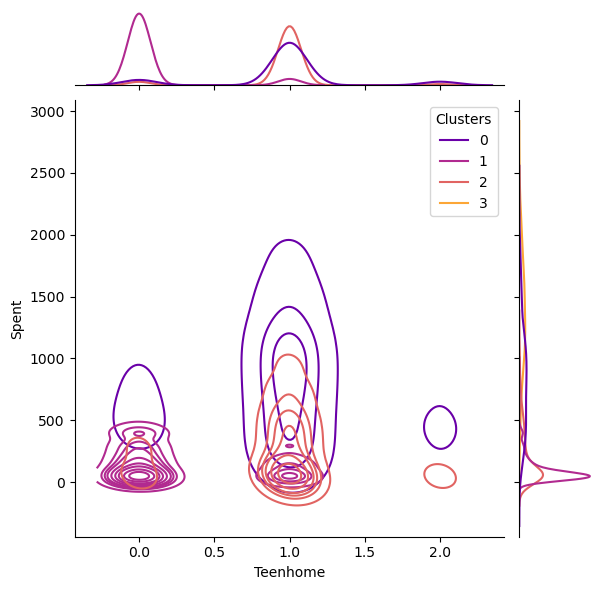

<Figure size 640x480 with 0 Axes>

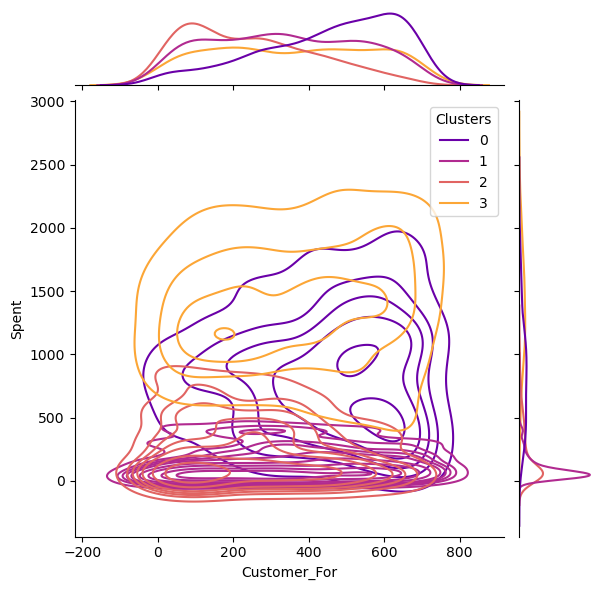

<Figure size 640x480 with 0 Axes>

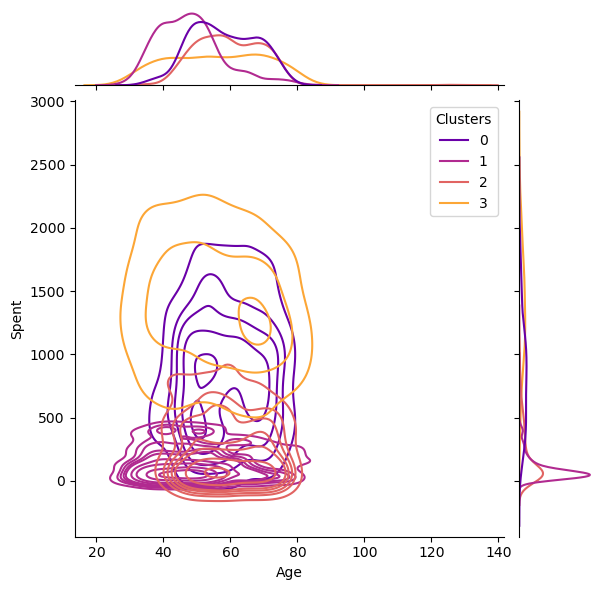

<Figure size 640x480 with 0 Axes>

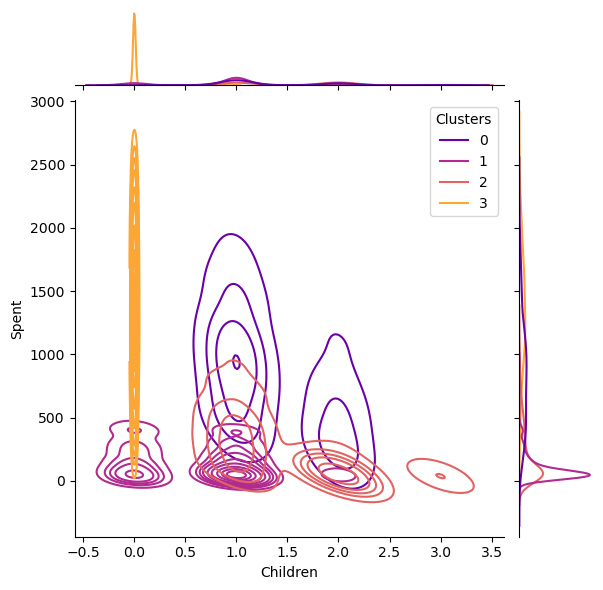

<Figure size 640x480 with 0 Axes>

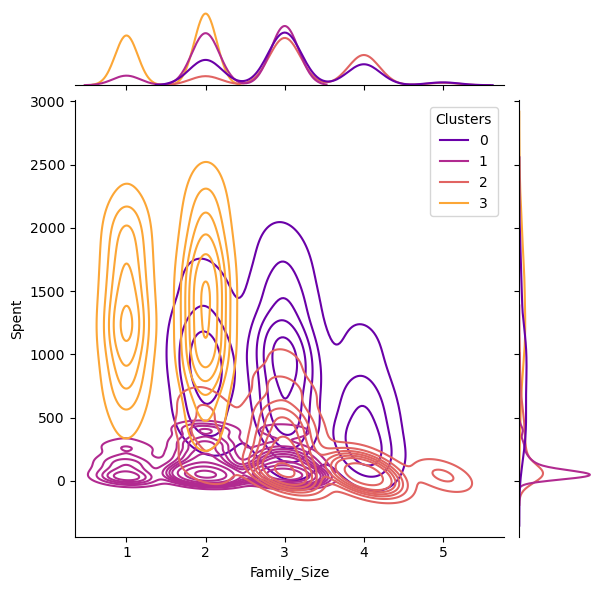

<Figure size 640x480 with 0 Axes>

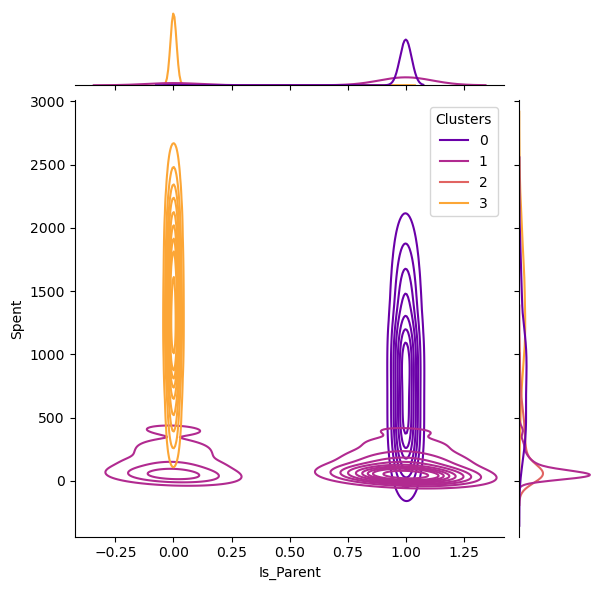

<Figure size 640x480 with 0 Axes>

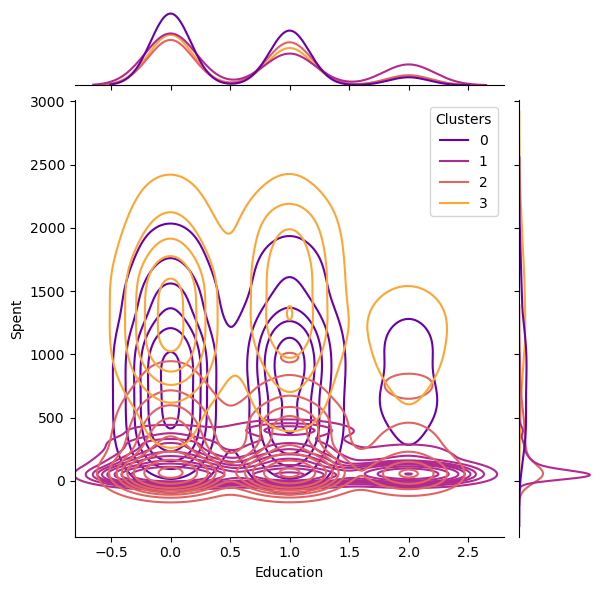

<Figure size 640x480 with 0 Axes>

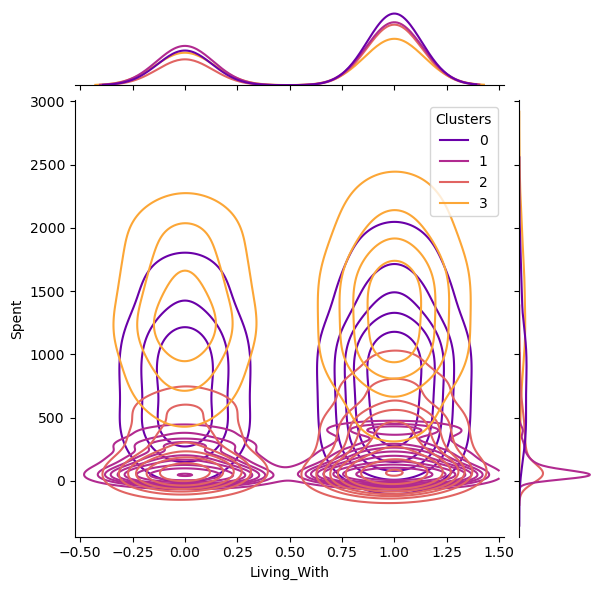

In [22]:
personal_traits = [
    "Kidhome",
    "Teenhome",
    "Customer_For",
    "Age",
    "Children",
    "Family_Size",
    "Is_Parent",
    "Education",
    "Living_With",
]

for i in personal_traits:
    plt.figure()
    sns.jointplot(
        x=data[i], y=data["Spent"], hue=data["Clusters"], kind="kde", palette=colors
    )
    plt.show()
